<a href="https://colab.research.google.com/github/premkumar6/Feyyn-Labs/blob/main/Customer_Segmentation_and_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
del df['CustomerID']

In [ ]:
print("Mean of Annual Income (k$) of females", df['Annual Income (k$)'].loc[df['Gender'] == 'Female'].mean())

Mean of Annual Income (k$) of females 59.25


In [ ]:
print("Mean of Annual Income (k$) of Males", df['Annual Income (k$)'].loc[df['Gender']== 'Male'].mean())

Mean of Annual Income (k$) of Males 62.22727272727273


In [ ]:
print("Mean of Spending Scor(1-100) of Males", df['Spending Score (1-100)'].loc[df['Gender']=='Male'].mean())

Mean of Spending Scor(1-100) of Males 48.51136363636363


In [ ]:
print("Mean of Spending Scor(1-100) of FeMales", df['Spending Score (1-100)'].loc[df['Gender']=='Female'].mean())

Mean of Spending Scor(1-100) of FeMales 51.526785714285715


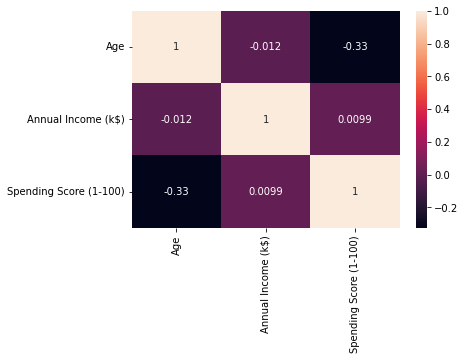

In [ ]:
df.corr()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.query('Gender == "Male"').Gender.count()


88

In [ ]:
df.query('Gender == "Female"').Gender.count()

112

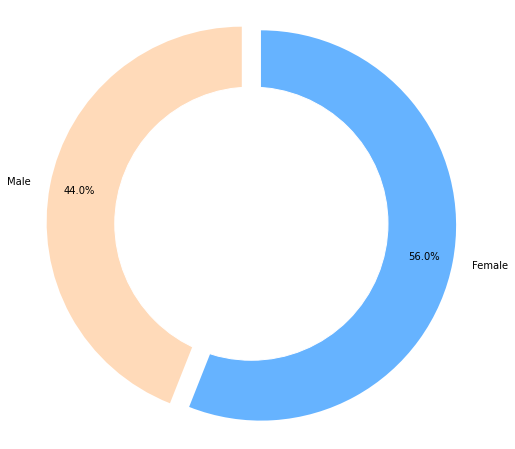

In [ ]:
labels = ['Male','Female']
sizes = [df.query('Gender == "Male"').Gender.count(),df.query('Gender == "Female"').Gender.count()]

colors = ['#ffdaB9','#66b3ff']
explode = (0.05,0.05)
plt.figure(figsize=(8,8))
my_circle = plt.Circle((0,0),0.7,color = 'white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p = plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

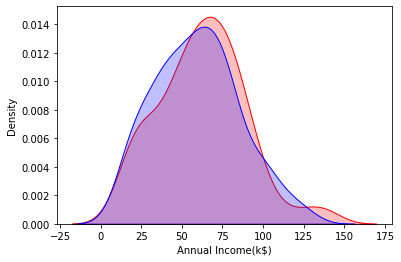

In [ ]:
p1 = sns.kdeplot(df['Annual Income (k$)'].loc[df['Gender'] == 'Male'],label = "Income Male", shade = True, color = 'r')
p1=sns.kdeplot(df['Annual Income (k$)'].loc[df['Gender'] == 'Female'],label='Income Female', shade=True, color="b")
plt.xlabel('Annual Income(k$)')
plt.show()

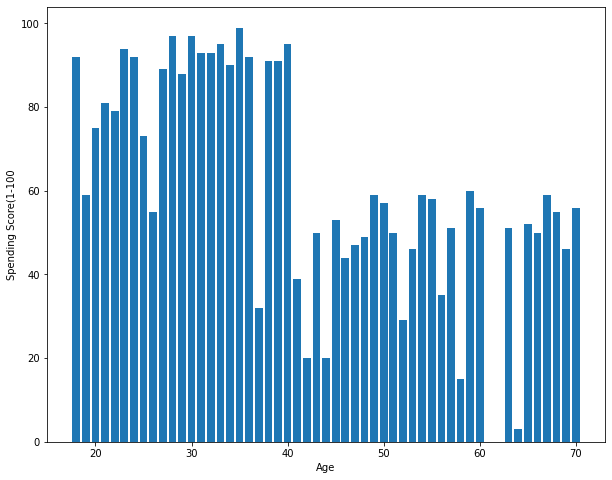

In [ ]:
df.sort_values(['Age'])
plt.figure(figsize=(10,8))
plt.bar(df['Age'],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100')
plt.show()


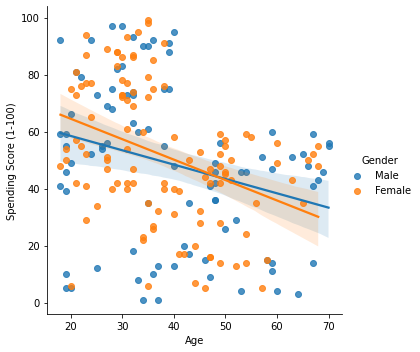

In [ ]:
sns.lmplot(x = 'Age', y = 'Spending Score (1-100)' , data = df, fit_reg=True, hue='Gender')
plt.show()

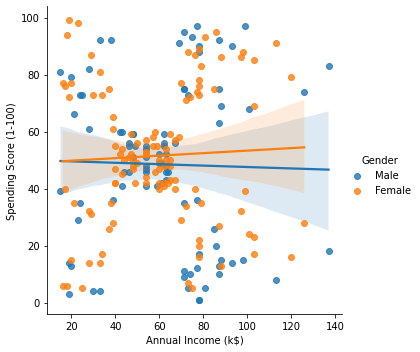

In [ ]:
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, fit_reg=True, hue='Gender')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


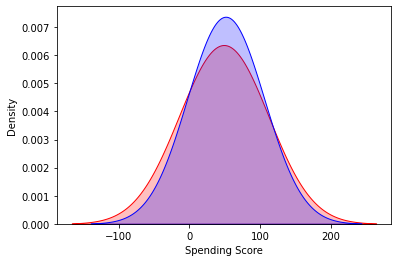

In [ ]:
p1=sns.kdeplot(df['Spending Score (1-100)'].loc[df['Gender'] == 'Male'],label='Density Male',bw=2, shade=True, color="r")
p1=sns.kdeplot(df['Spending Score (1-100)'].loc[df['Gender'] == 'Female'],label='Density Female',bw=2, shade=True, color="b")
plt.xlabel('Spending Score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

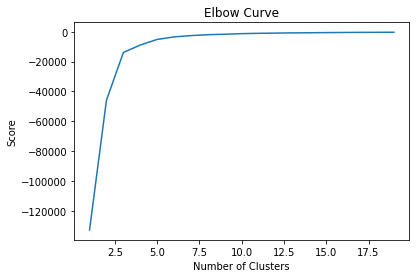

In [ ]:
Y = df[['Spending Score (1-100)']].values
X = df[['Annual Income (k$)']].values
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

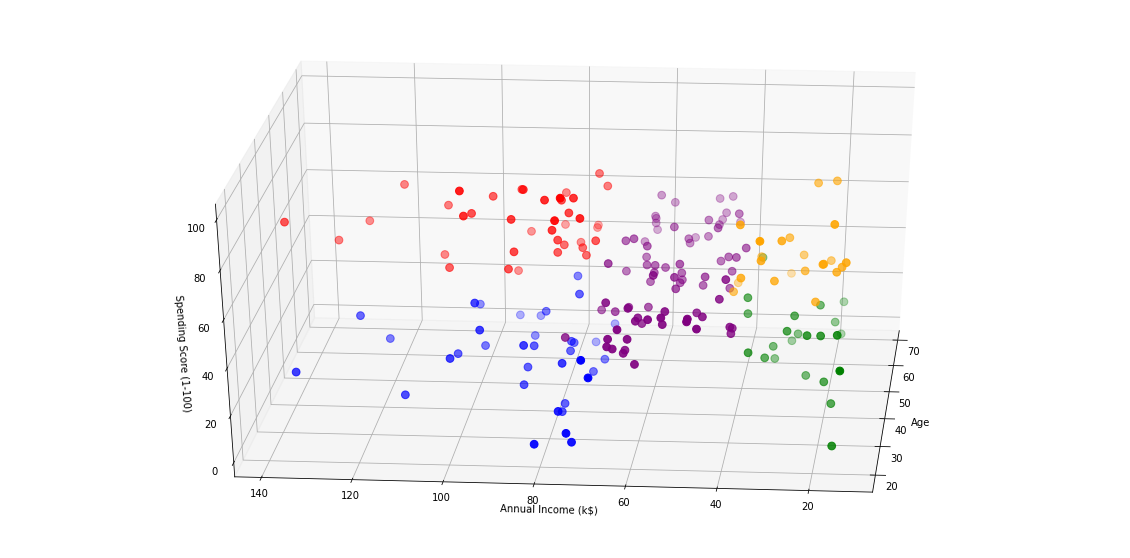

In [ ]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])

df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()